# Gerekli Kütüphanelerin Yüklenmesi

In [42]:
from warnings import simplefilter
simplefilter("ignore",category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import ARDRegression,GammaRegressor,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,RANSACRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import joblib

# Veri Setinin Yüklenmesi

In [43]:
dataset = pd.read_csv("bodyfat.csv")

# Veri Seti Hakkında Bilgiler

In [44]:
dataset.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [45]:
dataset.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [47]:
dataset.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [48]:
dataset.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

# Makine Öğrenmesi Başlangıç

## 'Weight' ve 'Height' Özniteliklerinin 'cm' Cinsine Dönüştürülmesi

In [49]:
dataset['Weight'] = dataset['Weight'] * 0.45
dataset['Height'] = dataset['Height'] * 2.54

In [50]:
dataset.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,69.4125,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,77.9625,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.3000,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.1375,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,82.9125,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Verilerin Görselleştirilmesi

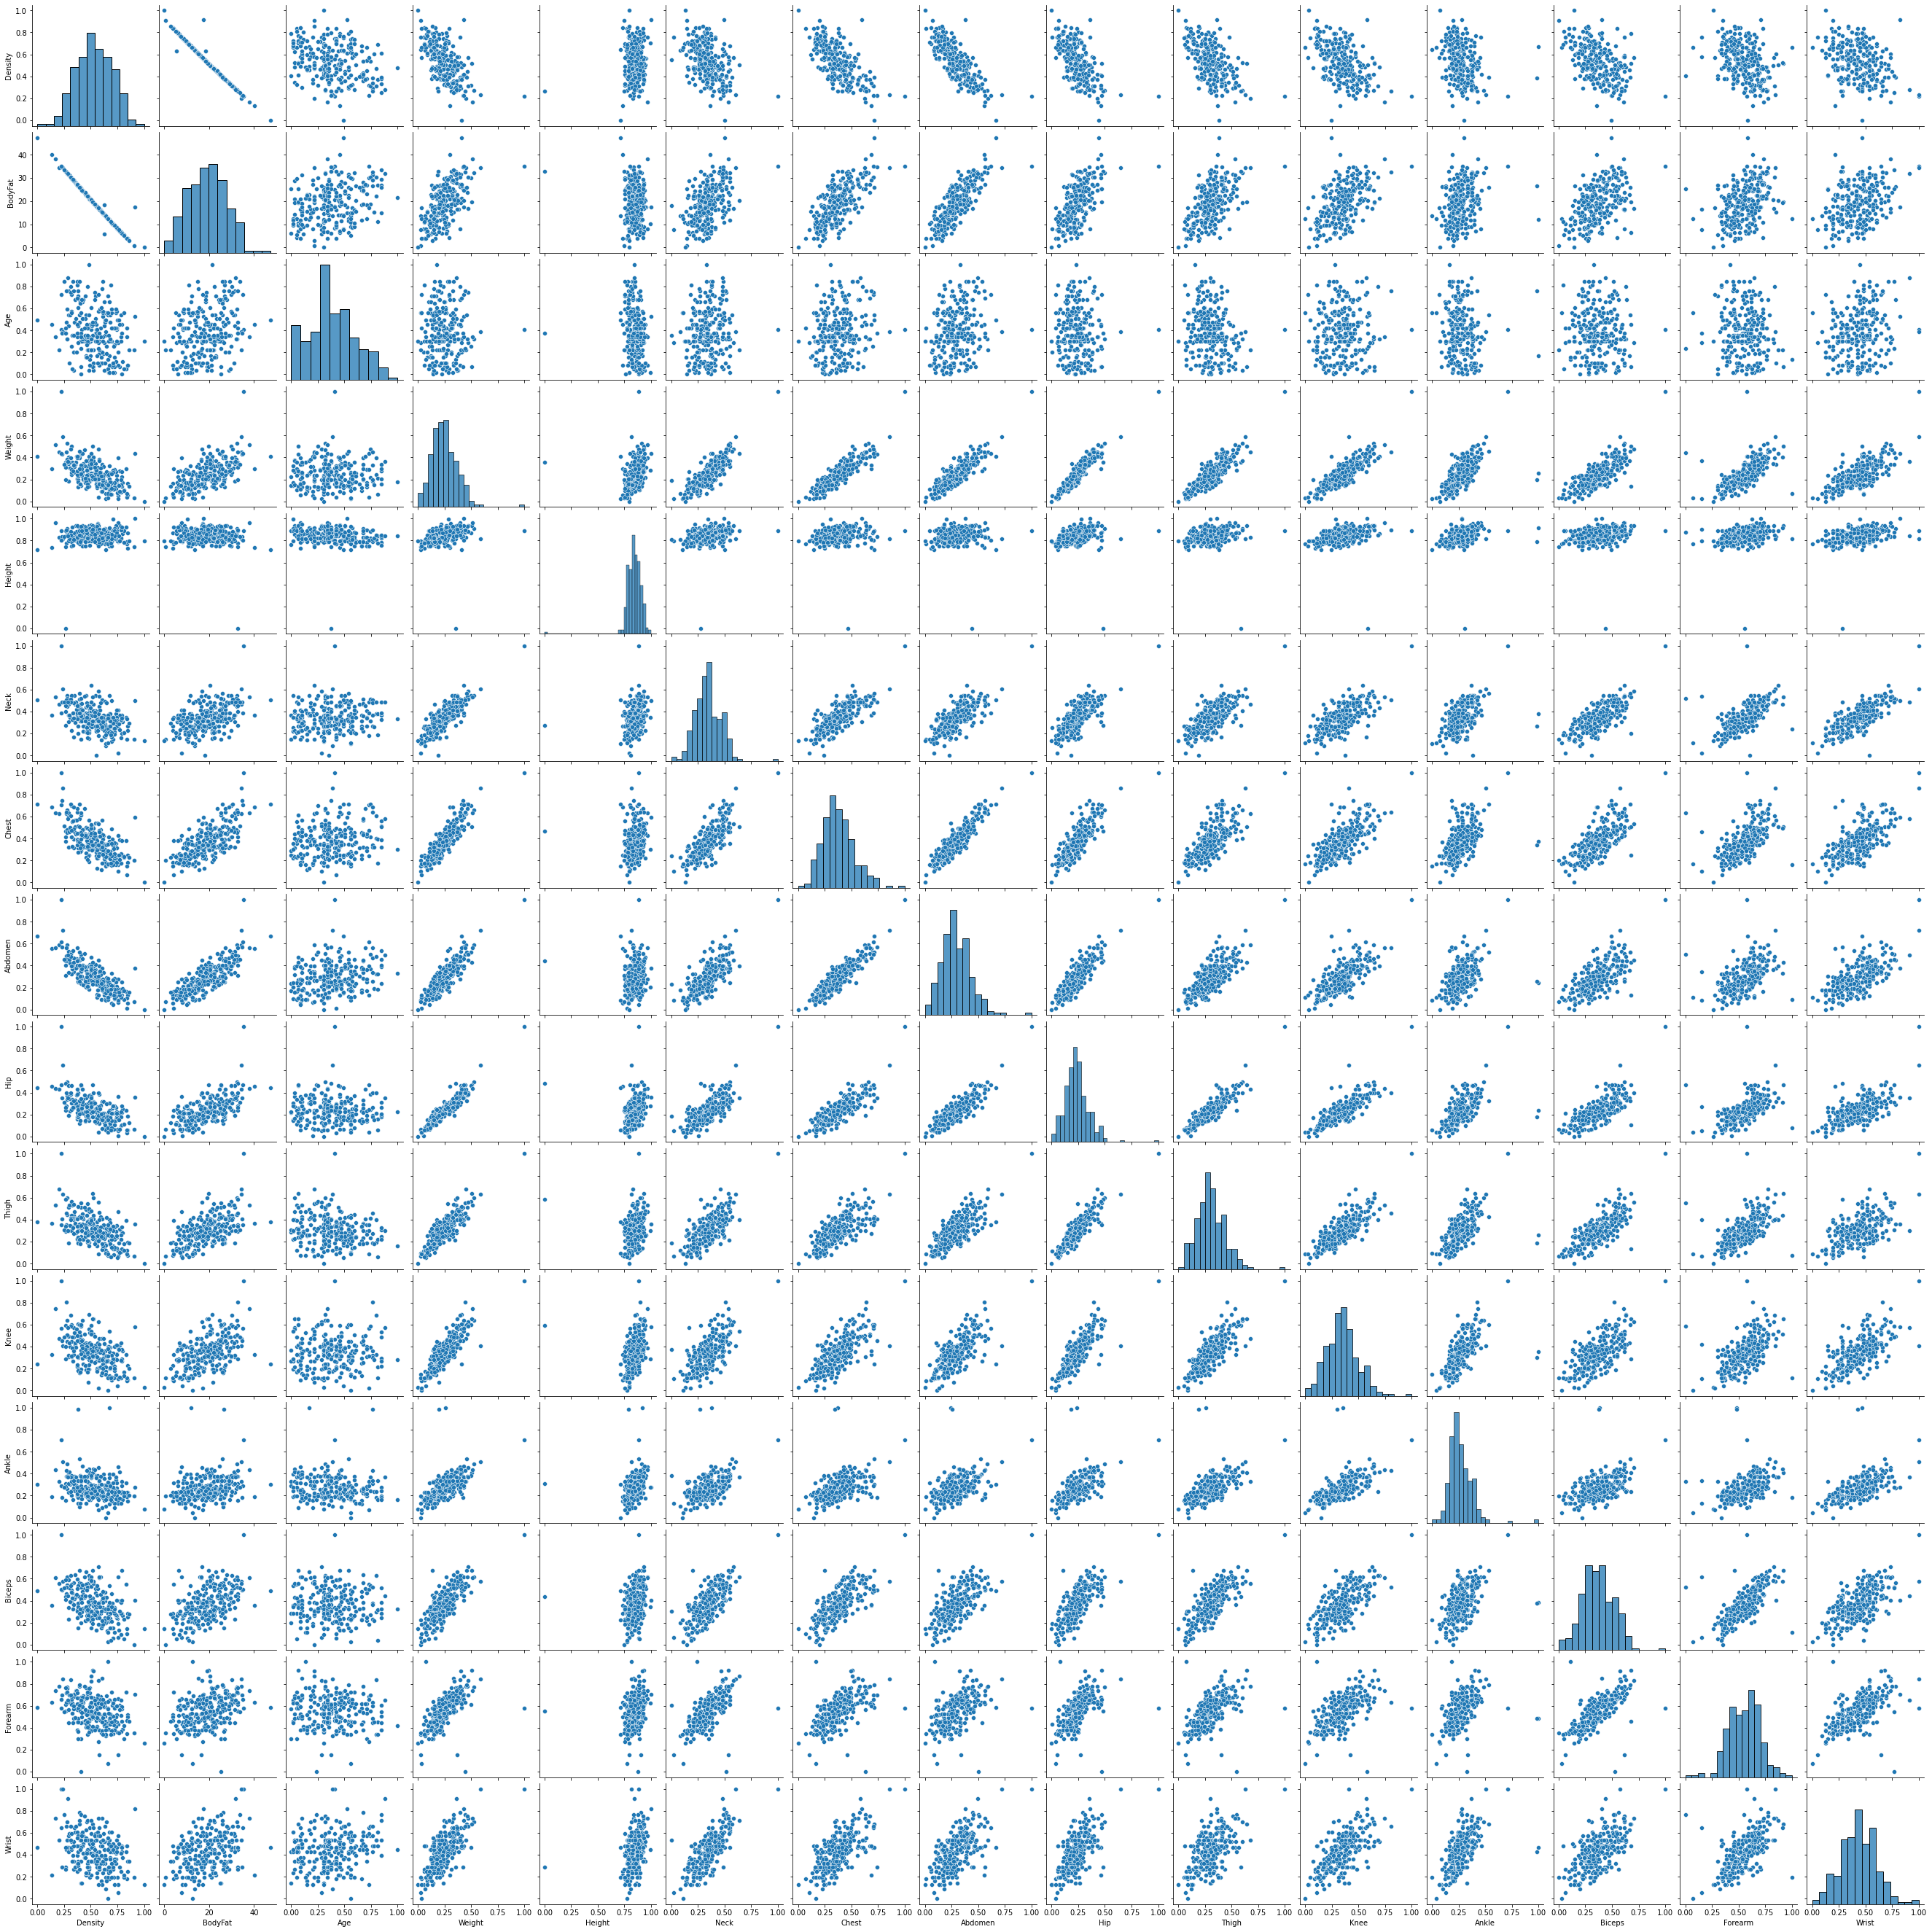

In [77]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

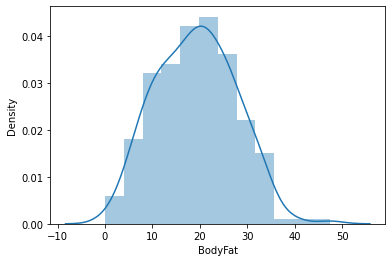

In [81]:
sns.distplot(dataset['BodyFat'])

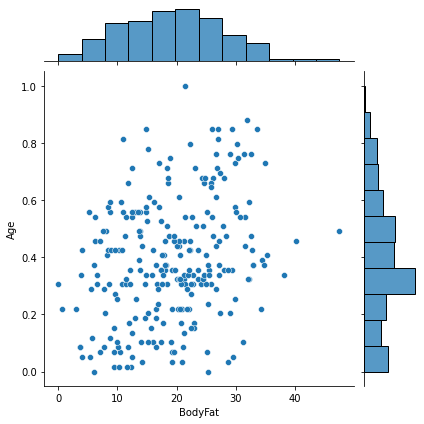

In [83]:
sns.jointplot(x='BodyFat',y='Age',data=dataset,kind='scatter')

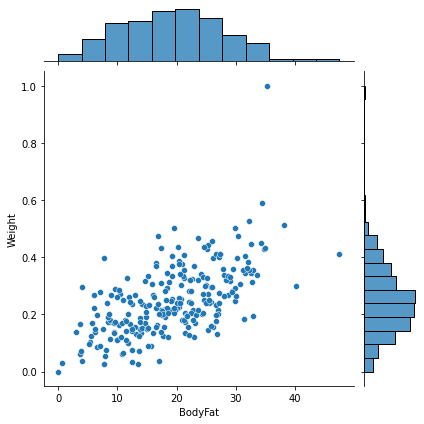

In [84]:
sns.jointplot(x='BodyFat',y='Weight',data=dataset,kind='scatter')

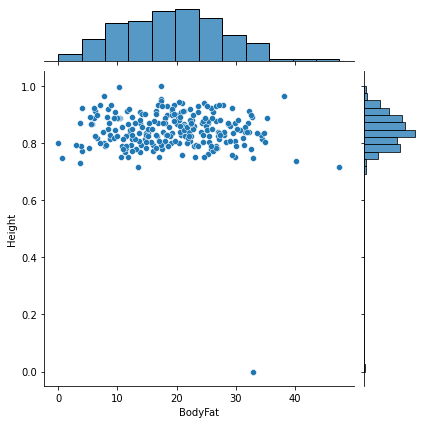

In [88]:
sns.jointplot(x='BodyFat',y='Height',data=dataset,kind='scatter')

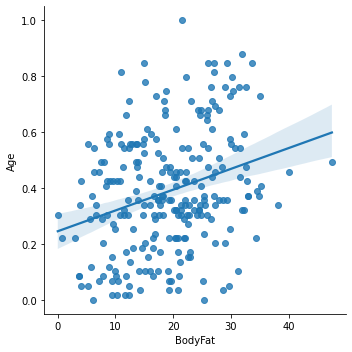

In [90]:
sns.lmplot(x='BodyFat',y='Age',data=dataset)

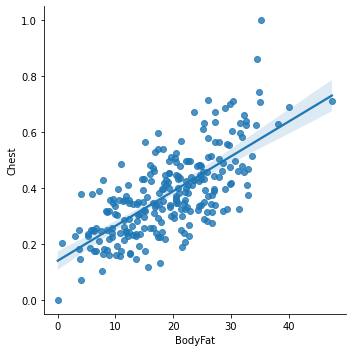

In [91]:
sns.lmplot(x='BodyFat',y='Chest',data=dataset)

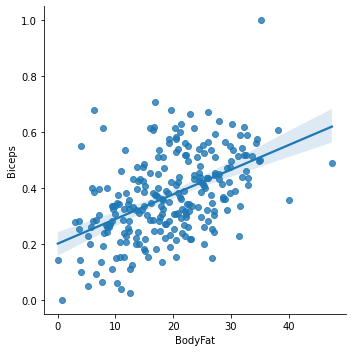

In [92]:
sns.lmplot(x='BodyFat',y='Biceps',data=dataset)

## Özniteliklerin Normalize Edilmesi

In [51]:
sc = MinMaxScaler()

labels_sc = ['Density','Age','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']
for s in labels_sc:
    dataset[labels_sc] = sc.fit_transform(dataset[labels_sc])

In [52]:
dataset.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,12.3,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,6.1,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,25.3,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,10.4,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,28.7,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286


## Özniteliklerin Bağımlı ve Bağımsız Değişkenler Olarak Ayrılması

In [53]:
X = dataset.drop(['BodyFat'],axis=1)
Y = dataset['BodyFat']

##  Verilerin Makine Öğrenimi İçin Eğitim ve Test Olarak Ayrılması

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [55]:
X_train.shape

(176, 14)

In [56]:
X_test.shape

(76, 14)

## Makine Öğrenimi İçin Regresyon Algoritmalarının Cross-Validation(Çapraz Doğrulama) Kullanılarak En Yüksek Başarımı Veren Algoritmaların Tespit Edilmesi

In [57]:
models = [
    ('ARDR',ARDRegression()),
    ('HubR',HuberRegressor()),
    ('LinearR',LinearRegression()),
    ('SGDR',SGDRegressor()),
    ('RANR',RANSACRegressor()),
    ('ADR',AdaBoostRegressor()),
    ('BR',BaggingRegressor()),
    ('ETR',ExtraTreesRegressor()),
    ('GBR',GradientBoostingRegressor()),
    ('RFR',RandomForestRegressor()),
    ('DTR',DecisionTreeRegressor()),
    ('MLPR',MLPRegressor()),
    ('KNNR',KNeighborsRegressor(n_neighbors=3)),
    ('XGBR',XGBRegressor()),
    ('CBR',CatBoostRegressor(iterations=10)),
]

names = []
results = []

for name,model in models:
    kfold = KFold(n_splits=10,random_state=42)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='r2')
    names.append(name)
    results.append(cv_results)
    print("Algoritma:{} / Score:{} / Loss:{}".format(name,cv_results.mean(),cv_results.std()))

Algoritma:ARDR / Score:0.9671481658595825 / Loss:0.06141602666363427
Algoritma:HubR / Score:0.970938278277951 / Loss:0.06367811578927805
Algoritma:LinearR / Score:0.9636074899015048 / Loss:0.06280509557461204
Algoritma:SGDR / Score:0.9032763119570626 / Loss:0.030165838935639722
Algoritma:RANR / Score:0.9705198691817417 / Loss:0.06421669094389264
Algoritma:ADR / Score:0.9489011577332109 / Loss:0.03159445982301836
Algoritma:BR / Score:0.9659102818196732 / Loss:0.03681218347082071
Algoritma:ETR / Score:0.9770961405753431 / Loss:0.02499452607306901
Algoritma:GBR / Score:0.9606041667749995 / Loss:0.05390090484039283
Algoritma:RFR / Score:0.9652768575022594 / Loss:0.038279004178663506
Algoritma:DTR / Score:0.8983831852100327 / Loss:0.09257747797355761
Algoritma:MLPR / Score:0.20095516878700953 / Loss:0.22143176768069942
Algoritma:KNNR / Score:0.8508737150991793 / Loss:0.04020753159960746
Algoritma:XGBR / Score:0.942017578879811 / Loss:0.06567262528391045
Learning rate set to 0.5
0:	learn: 5.

## En Yüksek Başarımı Veren 2 Algoritmanın Eğitilip Test Edilmesi

In [58]:
etr = ExtraTreesRegressor()
etr.fit(X_train,Y_train)
y_pred = etr.predict(X_test)

In [59]:
print("R2_Score,",r2_score(y_pred,Y_test))
print("MSE:",mean_squared_error(y_pred,Y_test))
print("MAE:",mean_absolute_error(y_pred,Y_test))

R2_Score, 0.9866424247903367
MSE: 0.7062065526315771
MAE: 0.36649999999999744


In [60]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

In [61]:
print("R2_Score,",r2_score(y_pred,Y_test))
print("MSE:",mean_squared_error(y_pred,Y_test))
print("MAE:",mean_absolute_error(y_pred,Y_test))

R2_Score, 0.9878265378855487
MSE: 0.6257022006507477
MAE: 0.5402632667480207


## Tahmin Edilen Değerler İle Gerçek Değerlerin Gösterilmesi

In [62]:
d= {"Tahminler":y_pred,"Gerçek Değerler":Y_test}
df = pd.DataFrame(d)

In [63]:
df

,Tahminler,Gerçek Değerler
165,19.515640,19.2
6,19.282128,19.2
111,27.660772,28.0
172,20.456513,20.5
115,16.659806,16.7
...,...,...
119,18.239449,18.1
75,14.323190,18.5
113,20.864344,21.3
118,24.804212,25.8


## 'LinearRegression' Algoritmasının Model Olarak Kaydedilmesi

In [64]:
#Modelin Kaydedilmesi
joblib.dump(lr,'model/lr_model.pkl')

['model/lr_model.pkl']

# Makine Öğrenmesi Sonu